<a href="https://colab.research.google.com/github/ori112/Boston-housing/blob/main/Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#impotring libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

import scipy.stats as stats

In [2]:
#reading the CSV to a df
df = pd.read_csv(r'/content/HousingData.csv')

In [4]:
#inspecting the df
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
#inspecting df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
#checking for null values
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
#dropping null records
df = df.dropna()

In [8]:
#checking to see any remaining null records
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
#inspecting statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


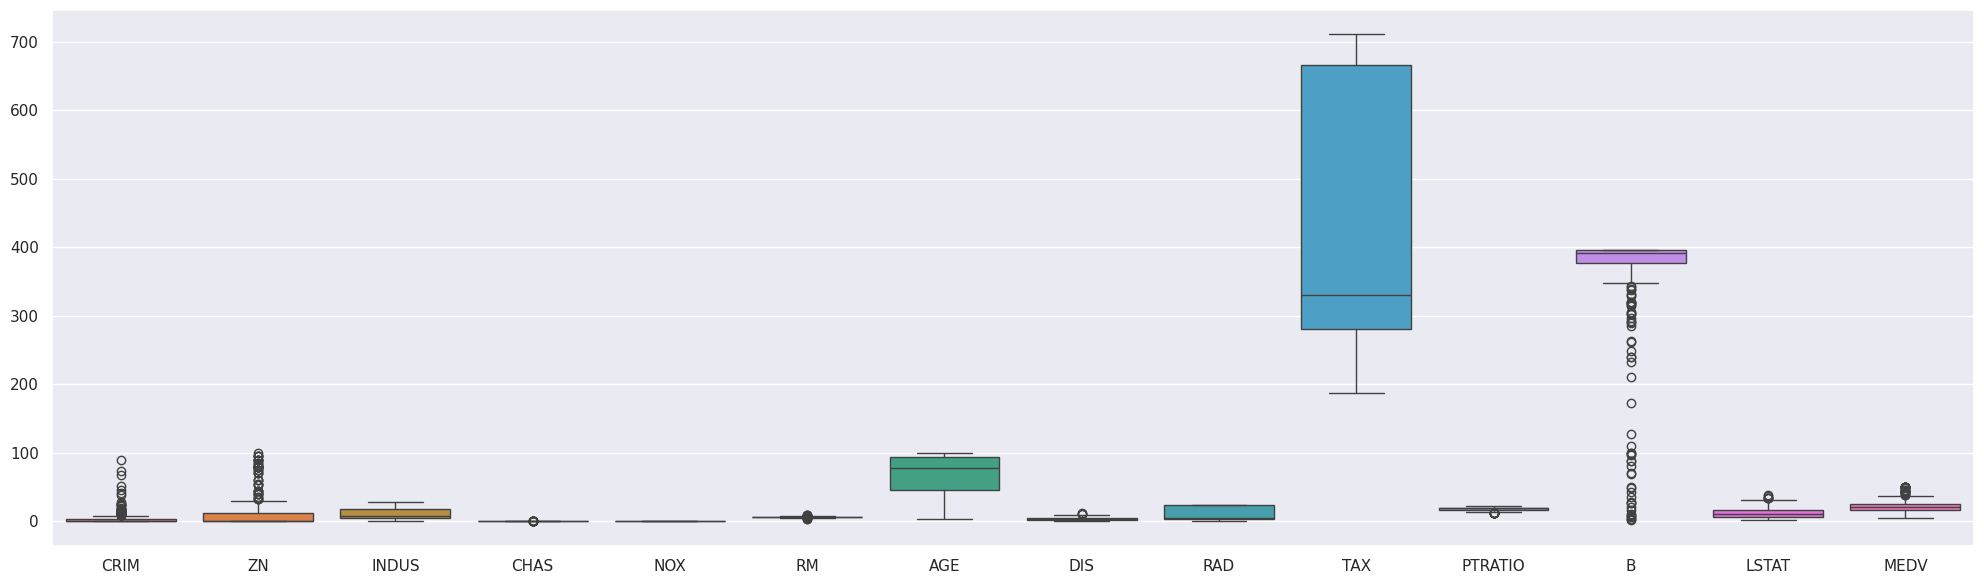

In [10]:
#plotting all columns outliers

plt.figure(figsize=(20, 6))
sns.set(style="darkgrid")
sns.boxplot(data=df)
plt.tight_layout()
plt.show()


In [11]:
#defining outlier cleaning function
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [12]:
#removing the outliers
for i in df:
  lower_range,upper_range = remove_outlier(df[i])
  df[i] = np.where(df[i] > upper_range, upper_range, df[i])
  df[i] = np.where(df[i] < lower_range, lower_range, df[i])

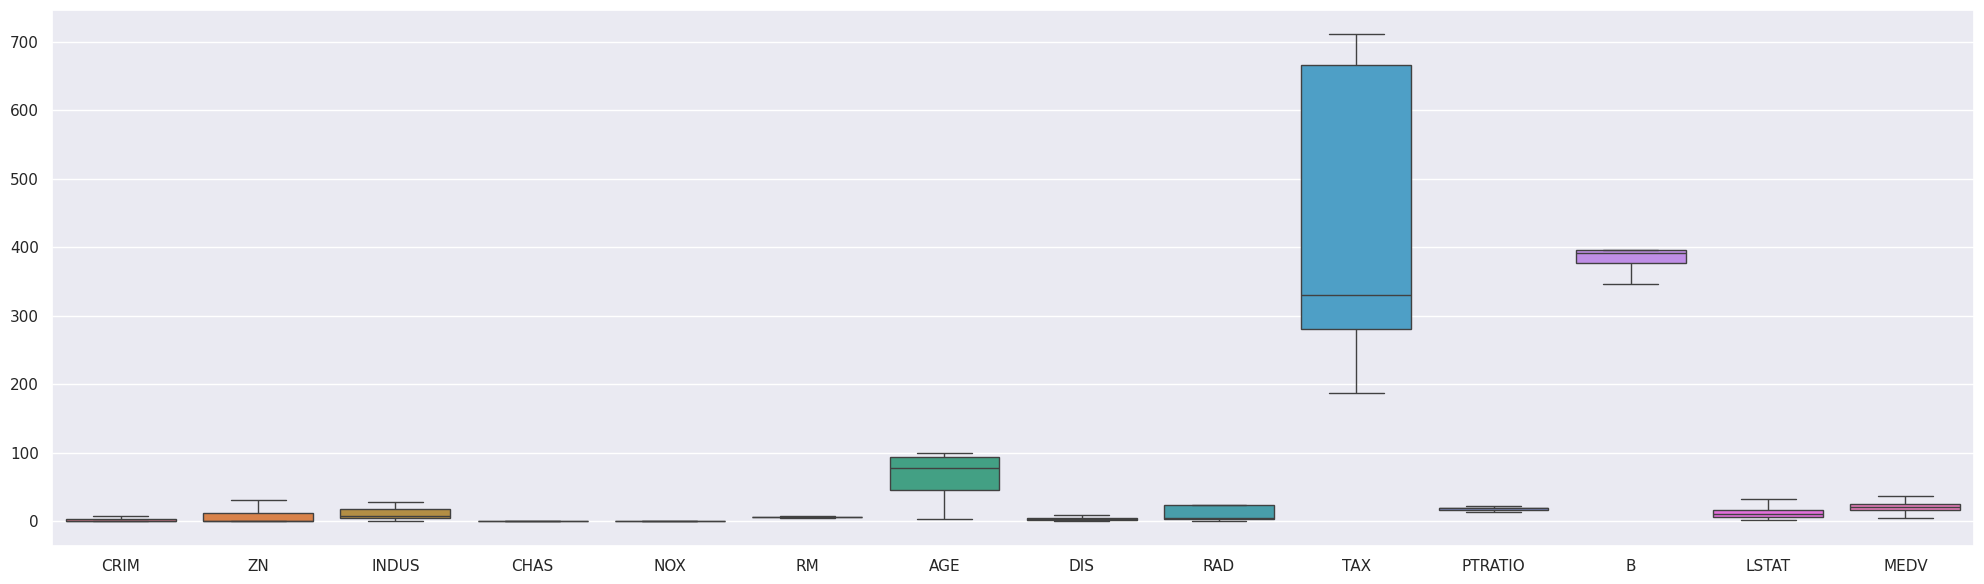

In [13]:
#plotting to check for remaining outliers

plt.figure(figsize=(20, 6))
sns.set(style="darkgrid")
sns.boxplot(data=df)
plt.tight_layout()
plt.show()

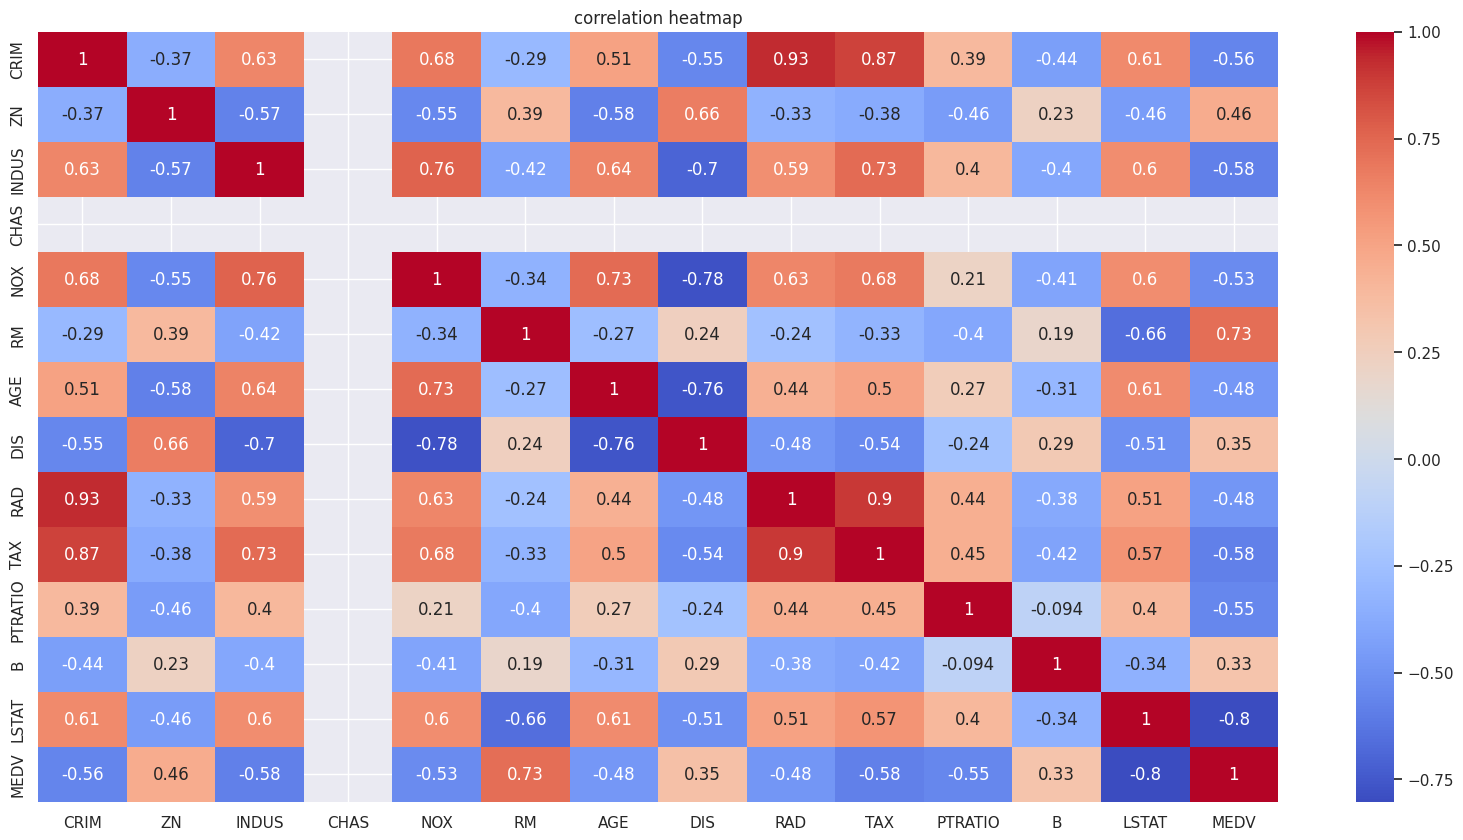

In [14]:
#plotting correlations all columns
plt.figure(figsize=(20, 10))
sns.heatmap(data = df.corr(), annot=True, cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()

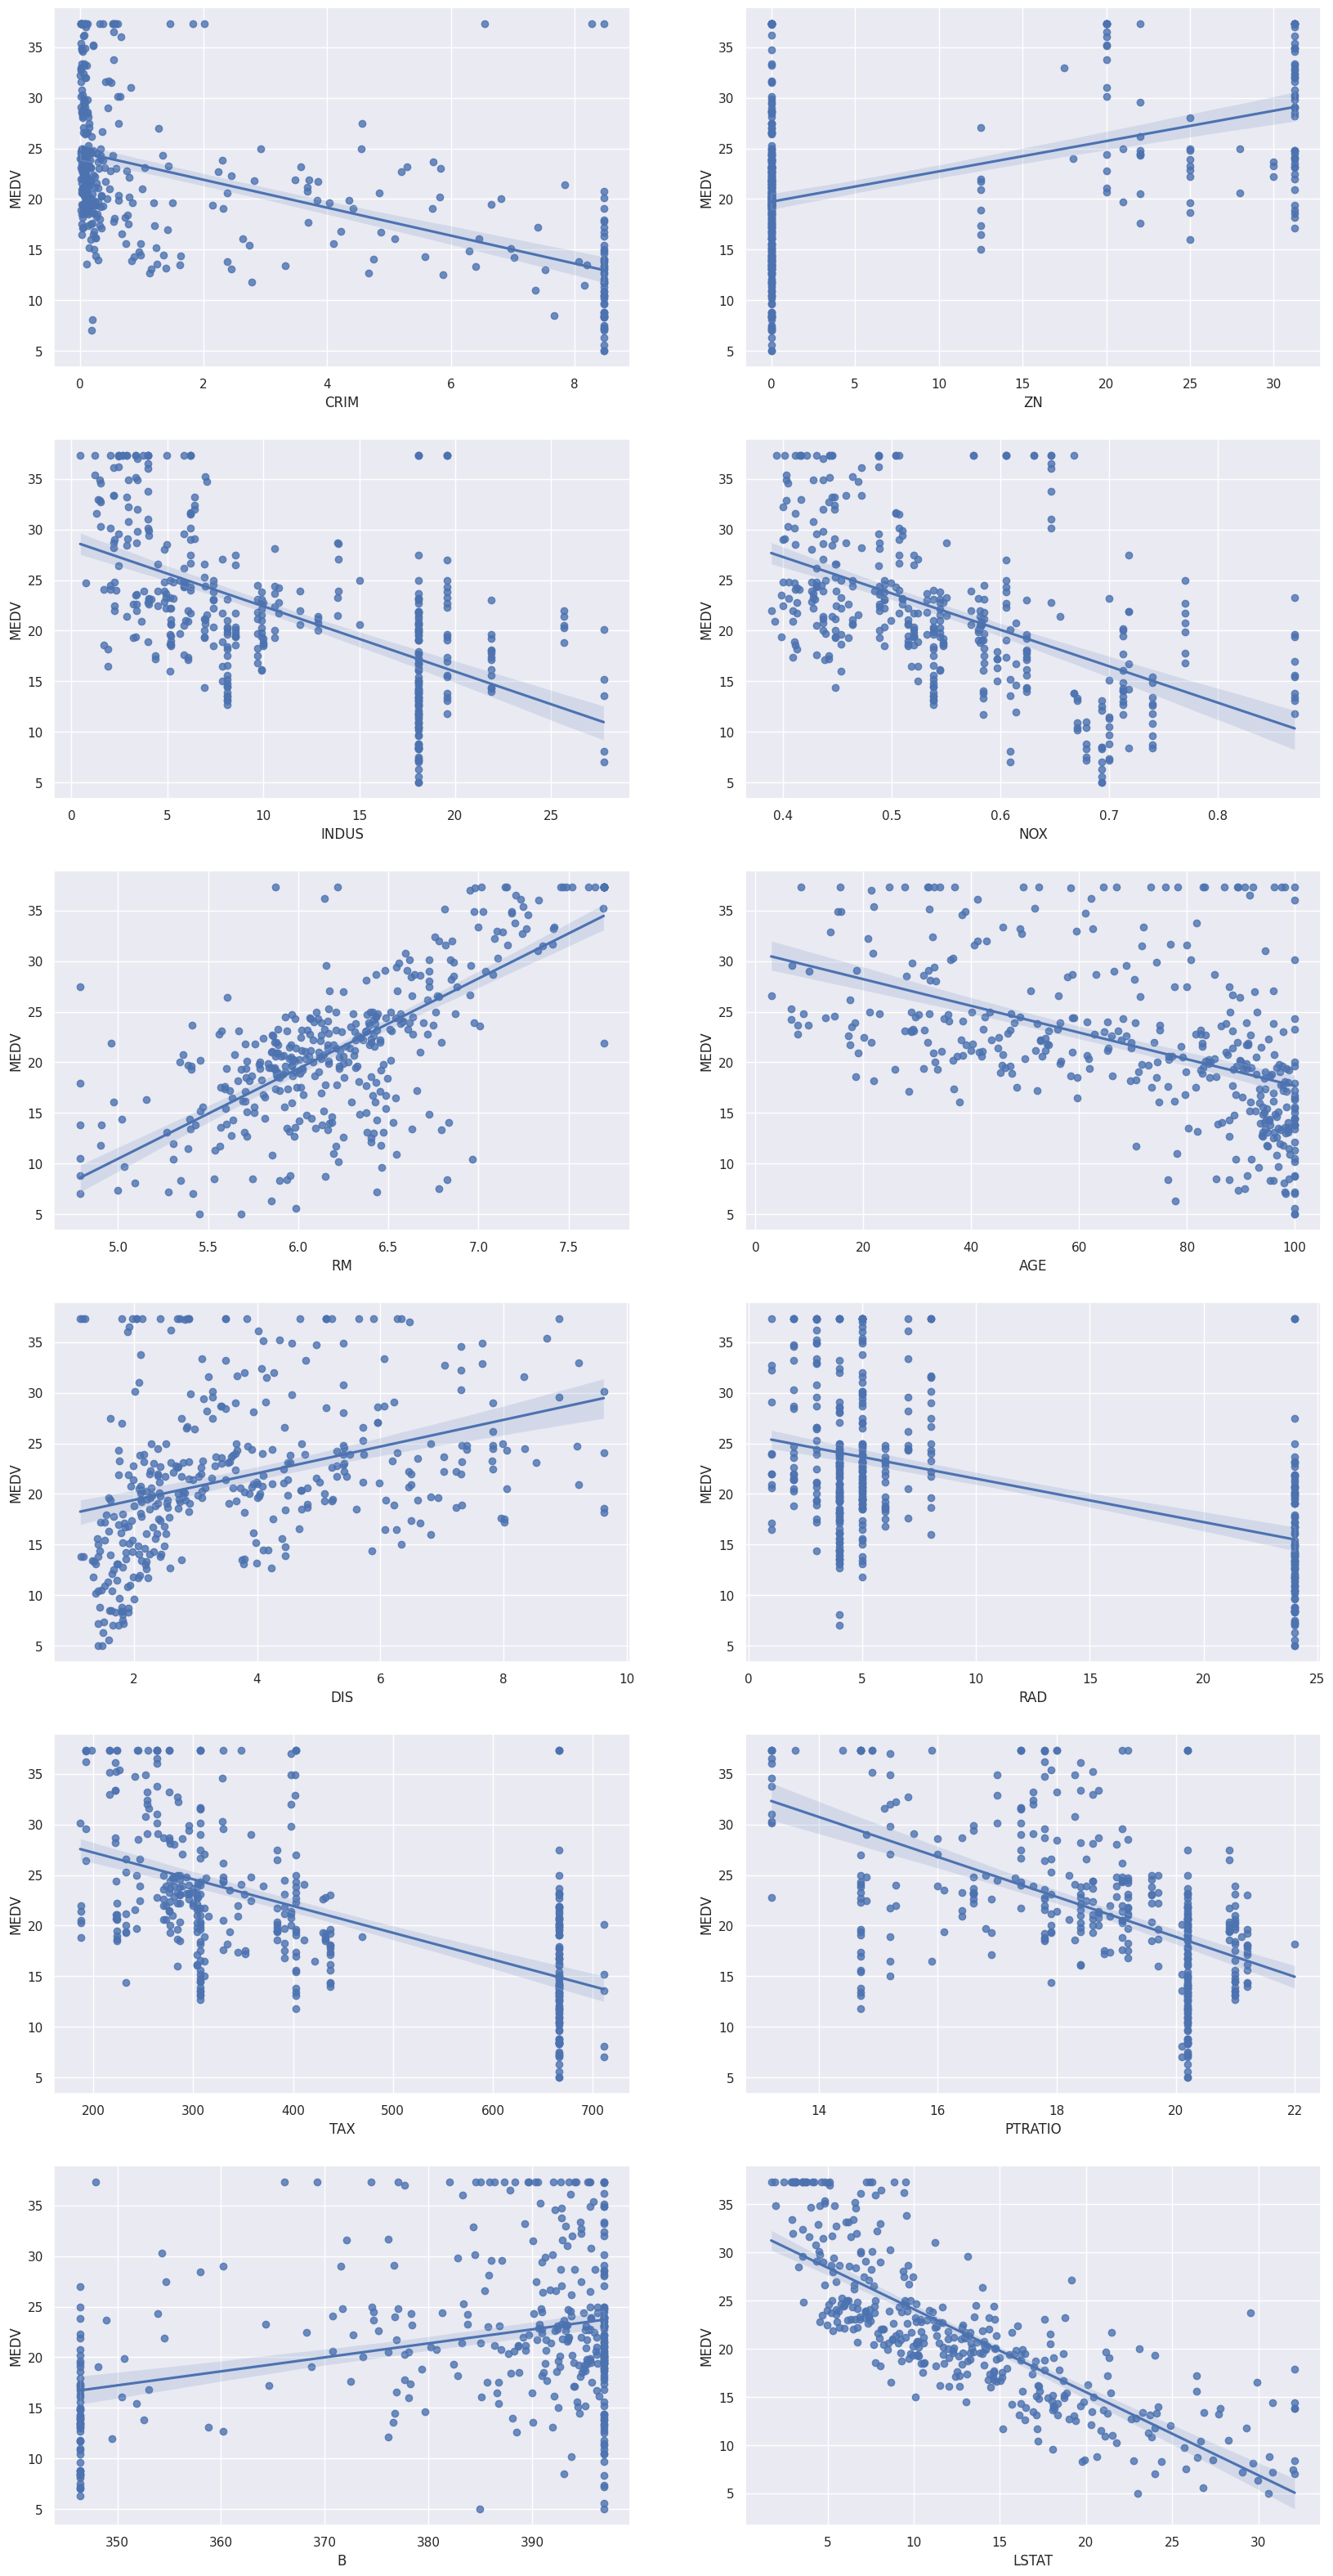

In [20]:
#plotting correlation of features and target label
fig, ax = plt.subplots(6, 2, figsize=(20, 40))

sns.regplot(x="CRIM", y="MEDV", data=df, ax=ax[0, 0])
sns.regplot(x="ZN", y="MEDV", data=df, ax=ax[0, 1])
sns.regplot(x="INDUS", y="MEDV", data=df, ax=ax[1, 0])
sns.regplot(x="NOX", y="MEDV", data=df, ax=ax[1, 1])
sns.regplot(x="RM", y="MEDV", data=df, ax=ax[2, 0])
sns.regplot(x="AGE", y="MEDV", data=df, ax=ax[2, 1])
sns.regplot(x="DIS", y="MEDV", data=df, ax=ax[3, 0])
sns.regplot(x="RAD", y="MEDV", data=df, ax=ax[3, 1])
sns.regplot(x="TAX", y="MEDV", data=df, ax=ax[4, 0])
sns.regplot(x="PTRATIO", y="MEDV", data=df, ax=ax[4, 1])
sns.regplot(x="B", y="MEDV", data=df, ax=ax[5, 0])
sns.regplot(x="LSTAT", y="MEDV", data=df, ax=ax[5, 1])


plt.show()

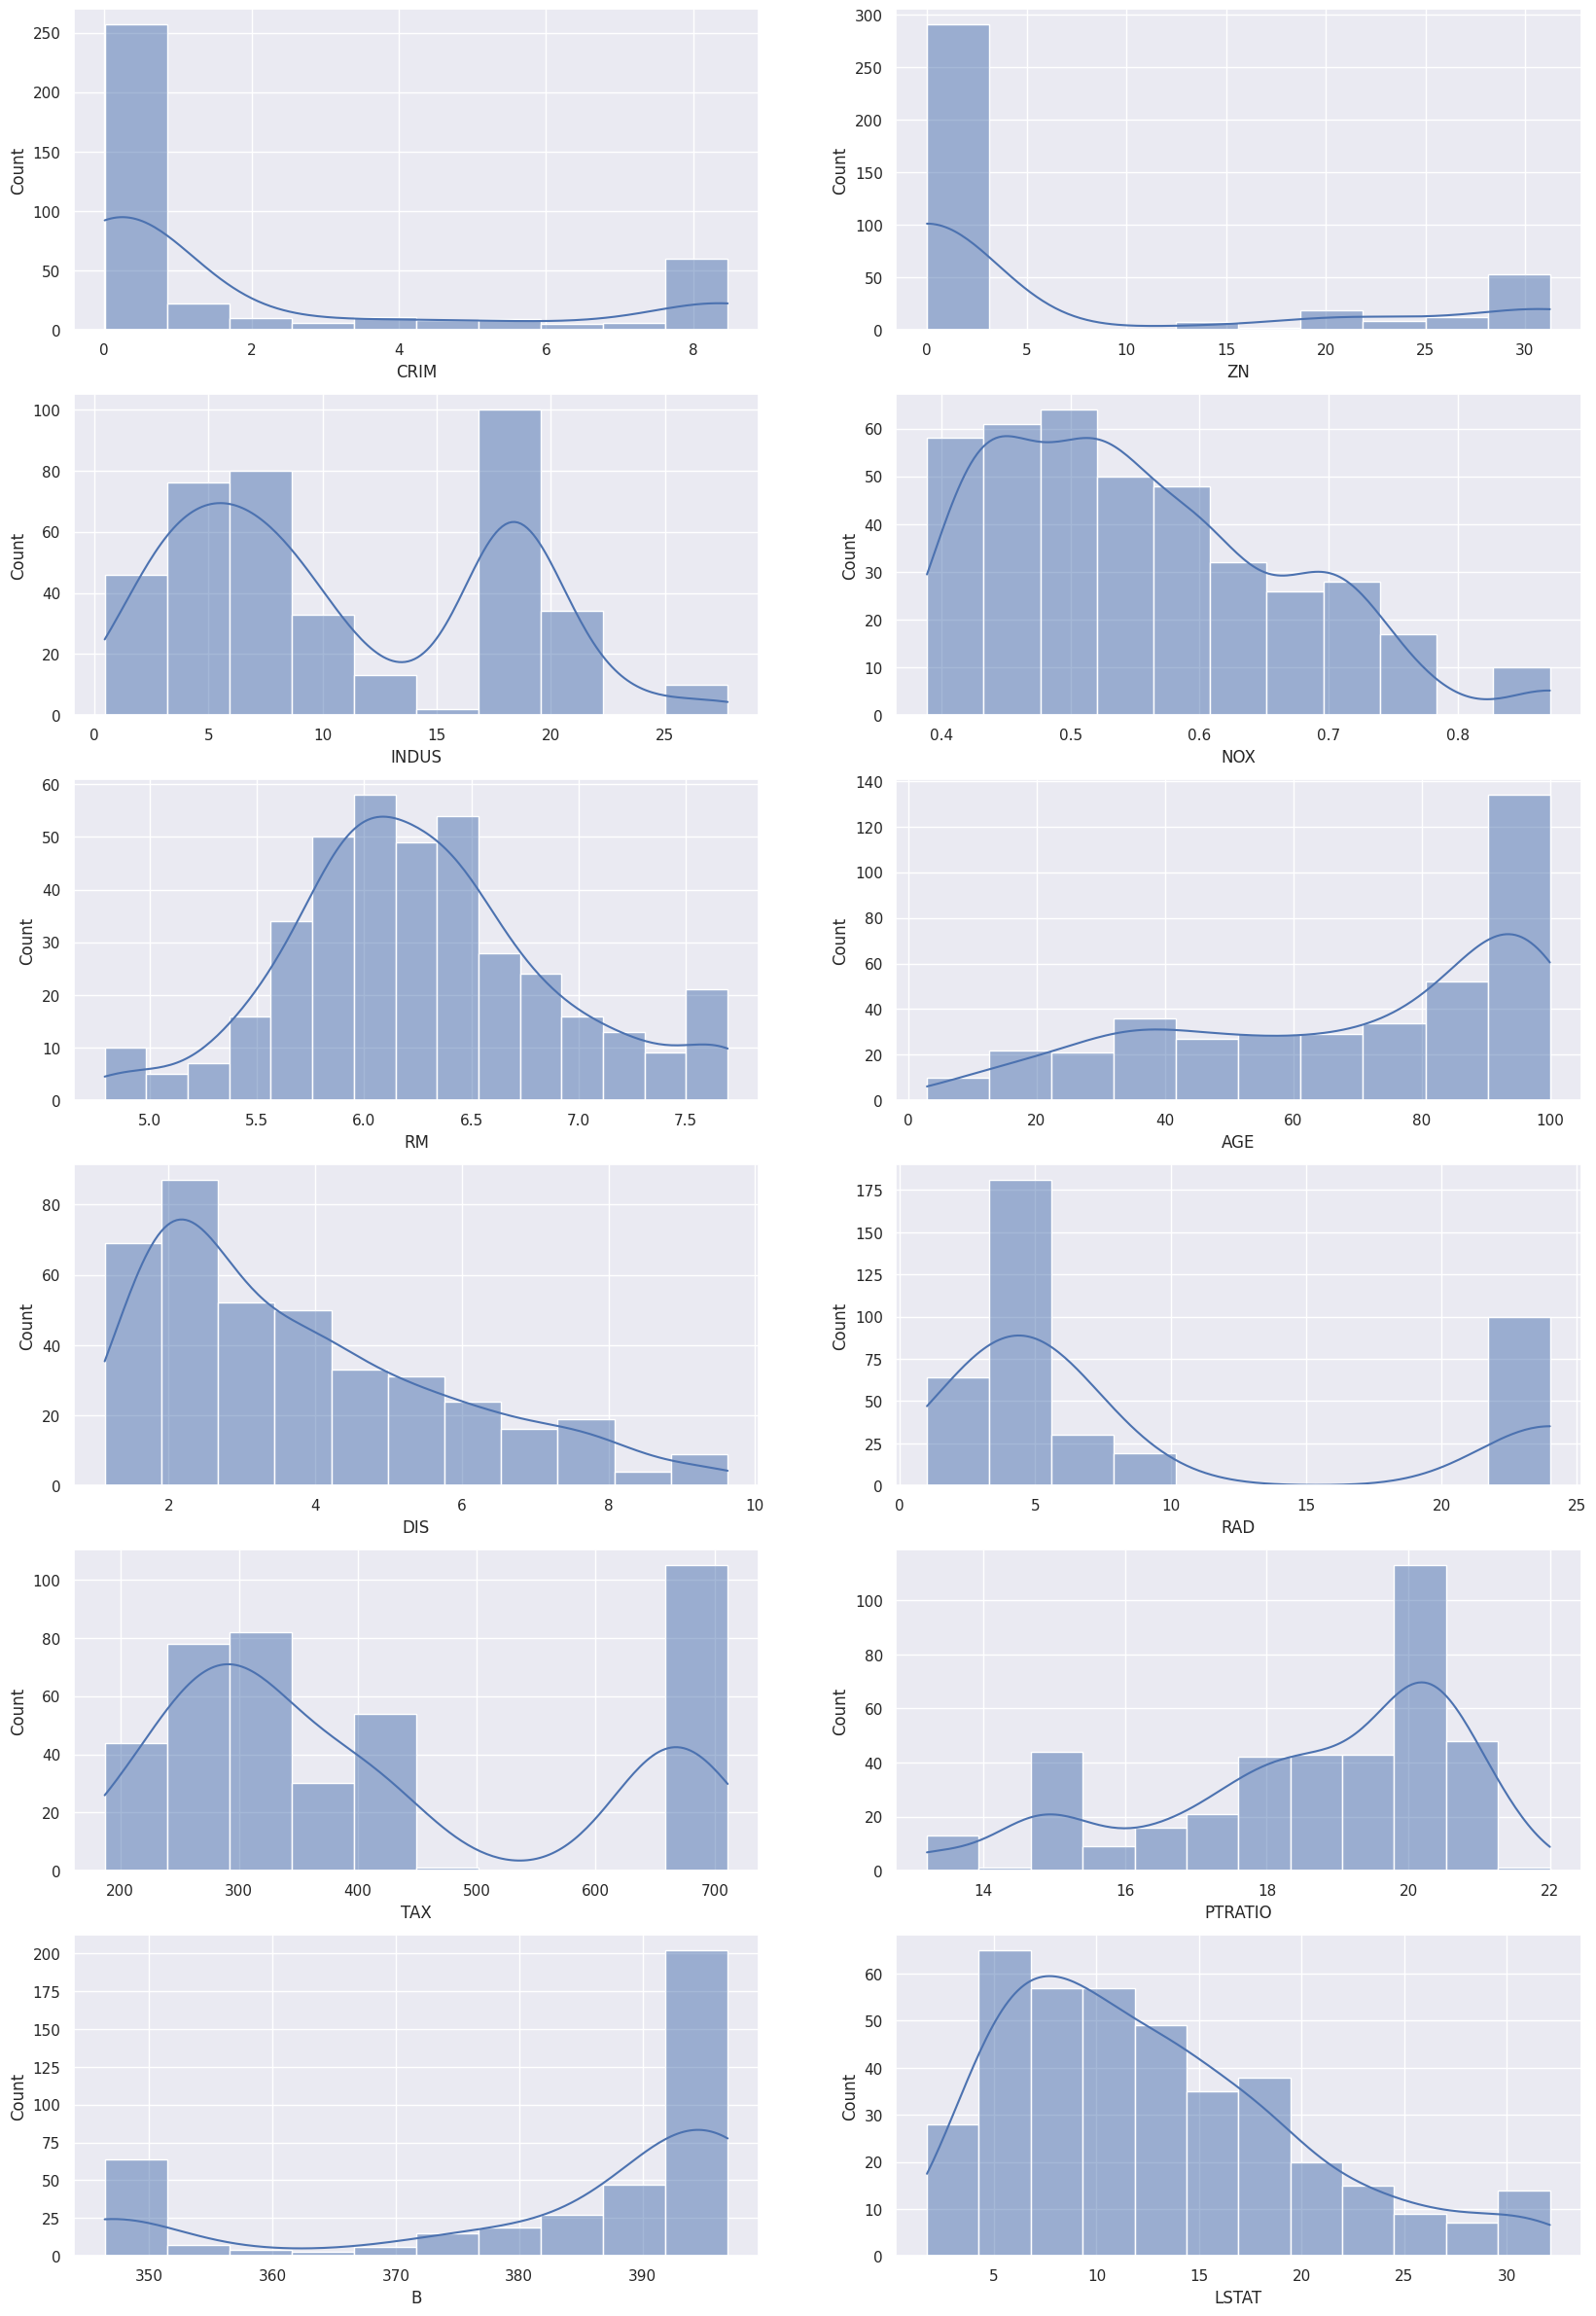

In [29]:
#plotting distributions of features and target label
fig, ax = plt.subplots(6, 2, figsize=(20, 30))

sns.histplot(x=df["CRIM"], kde=True, ax=ax[0, 0])
sns.histplot(x=df["ZN"], kde=True, ax=ax[0, 1])
sns.histplot(x=df["INDUS"], kde=True, ax=ax[1, 0])
sns.histplot(x=df["NOX"], kde=True, ax=ax[1, 1])
sns.histplot(x=df["RM"], kde=True, ax=ax[2, 0])
sns.histplot(x=df["AGE"], kde=True, ax=ax[2, 1])
sns.histplot(x=df["DIS"], kde=True, ax=ax[3, 0])
sns.histplot(x=df["RAD"], kde=True, ax=ax[3, 1])
sns.histplot(x=df["TAX"], kde=True, ax=ax[4, 0])
sns.histplot(x=df["PTRATIO"], kde=True, ax=ax[4, 1])
sns.histplot(x=df["B"], kde=True, ax=ax[5, 0])
sns.histplot(x=df["LSTAT"], kde=True, ax=ax[5, 1])


plt.show()

In [30]:
#seperating the target label from df and computing mutal_info score
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

mi_score = mutual_info_regression(X,y)
mi_score = pd.Series(mi_score)
mi_score.index = X.columns
mi_score.sort_values(ascending=False)

LSTAT      0.722846
RM         0.505210
INDUS      0.461515
NOX        0.433188
PTRATIO    0.376450
CRIM       0.342327
AGE        0.318744
DIS        0.317043
TAX        0.312470
ZN         0.165359
RAD        0.163745
B          0.102811
CHAS       0.003579
dtype: float64

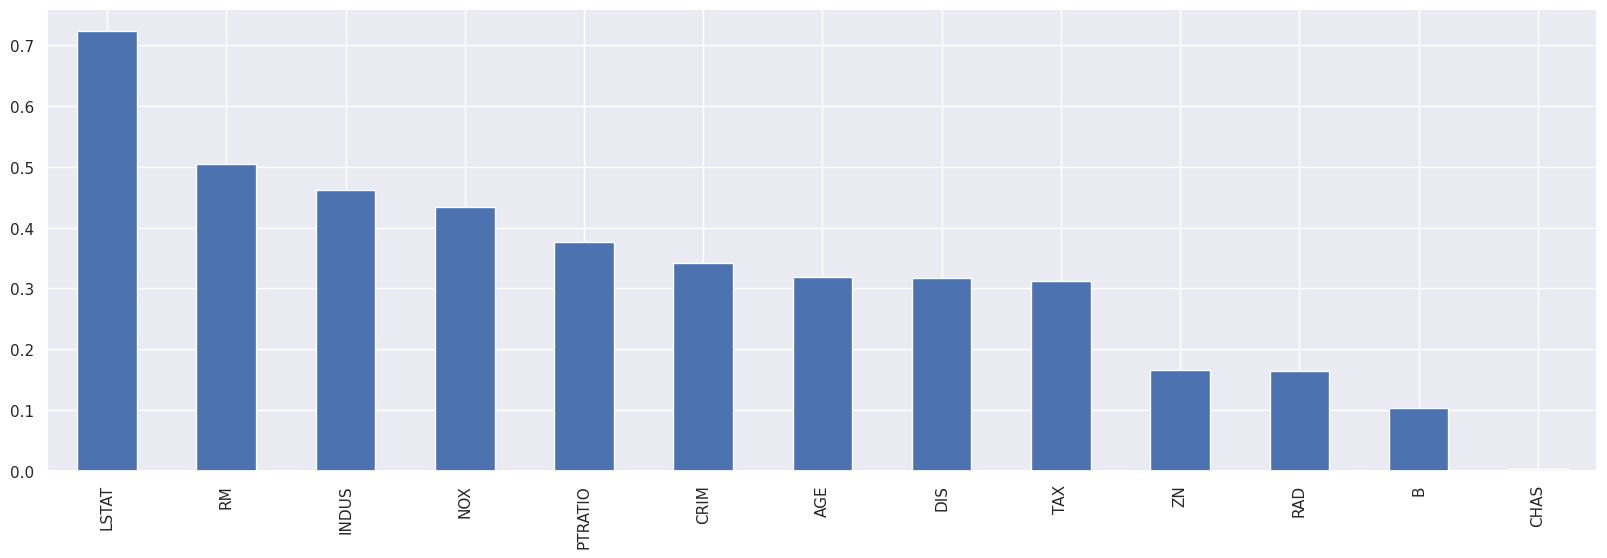

In [31]:
ax = mi_score.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.show()

In [35]:
X = df.drop(["CHAS", "B"], axis = 1)
y = df["MEDV"]

In [36]:
#splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [37]:
#applying standard scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Linear Regression

In [38]:
#initializing model
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [39]:
#defining statistics
mse = mean_squared_error(y_test, pred_lr)
r2 = r2_score(y_test, pred_lr)
rmse = np.sqrt(mse)

In [42]:
#inspecting statistics
print("mse: ", mse)
print("rmse: ", rmse)
print("r2: ", r2)

mse:  2.7401888603499613
rmse:  1.655351582096674
r2:  0.945529039402182


In [43]:
#cross validation
train_data = cross_val_score(lr,X_train,y_train,cv=5).mean()
test_data = cross_val_score(lr,X_test,y_test,cv=5).mean()

print("Train Data Cross_val_score : ", train_data)
print("Test Data Cross_val_score : ", test_data)

Train Data Cross_val_score :  1.0
Test Data Cross_val_score :  1.0


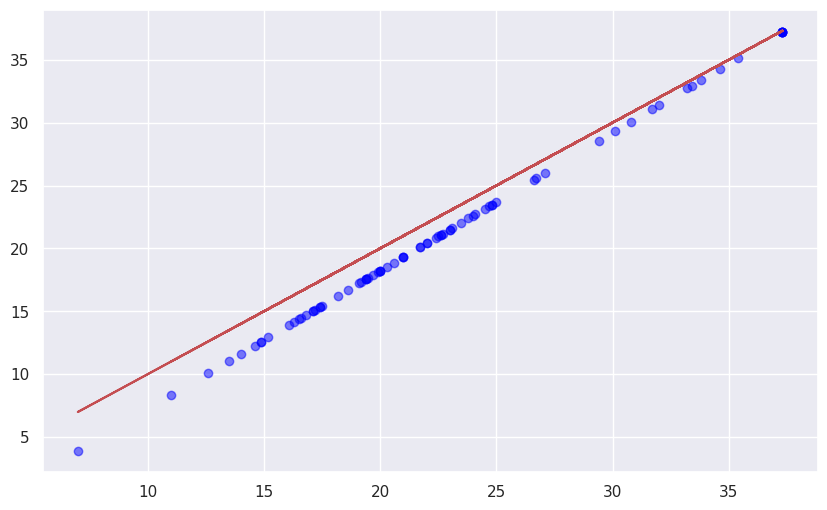

In [45]:
# plotting test and pred values
plt.figure(figsize=(10,6))
plt.scatter(y_test,pred_lr, c="blue", alpha=0.5)
plt.plot(y_test,y_test,'r')

# decision tree Regressor

In [54]:
#initializing model
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred_dtr = dtr.predict(X_test)

In [49]:
#defining statistics
mse = mean_squared_error(y_test, pred_dtr)
r2 = r2_score(y_test, pred_dtr)
rmse = np.sqrt(mse)

In [50]:
#inspecting statistics
print("mse: ", mse)
print("rmse: ", rmse)
print("r2: ", r2)

mse:  2.687848101265822
rmse:  1.6394657975285187
r2:  0.9465694974038134


In [51]:
#cross validation
train_data = cross_val_score(dtr,X_train,y_train,cv=5).mean()
test_data = cross_val_score(dtr,X_test,y_test,cv=5).mean()

print("Train Data Cross_val_score : ", train_data)
print("Test Data Cross_val_score : ", test_data)

Train Data Cross_val_score :  0.9987157954905864
Test Data Cross_val_score :  0.9813256685526776


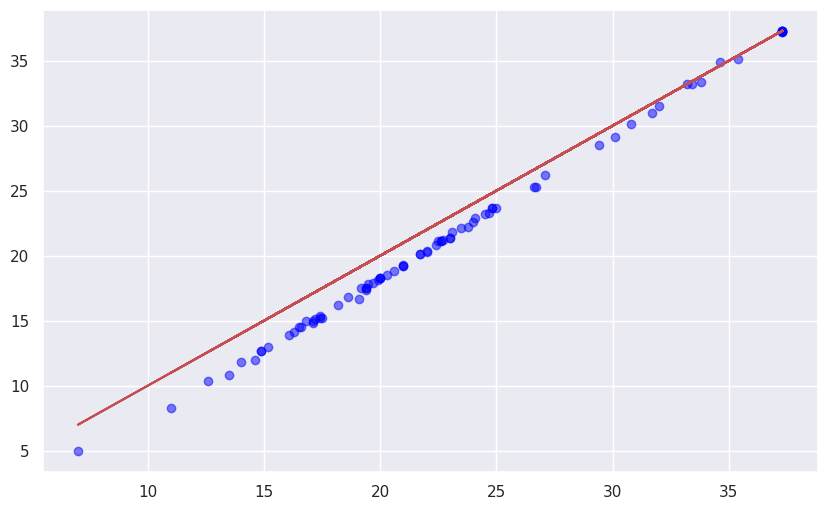

In [52]:
# plotting test and pred values
plt.figure(figsize=(10,6))
plt.scatter(y_test,pred_dtr, c="blue", alpha=0.5)
plt.plot(y_test,y_test,'r')

# random forest Regressor

In [57]:
#initializing model
rf = RandomForestRegressor(n_estimators=200)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

In [58]:
#defining statistics
mse = mean_squared_error(y_test, pred_rf)
r2 = r2_score(y_test, pred_rf)
rmse = np.sqrt(mse)

In [59]:
#inspecting statistics
print("mse: ", mse)
print("rmse: ", rmse)
print("r2: ", r2)

mse:  2.6693277183544386
rmse:  1.6338077360431487
r2:  0.9469376556218179


In [60]:
#cross validation
train_data = cross_val_score(dtr,X_train,y_train,cv=5).mean()
test_data = cross_val_score(dtr,X_test,y_test,cv=5).mean()

print("Train Data Cross_val_score : ", train_data)
print("Test Data Cross_val_score : ", test_data)

Train Data Cross_val_score :  0.9985613062051352
Test Data Cross_val_score :  0.983100682543758


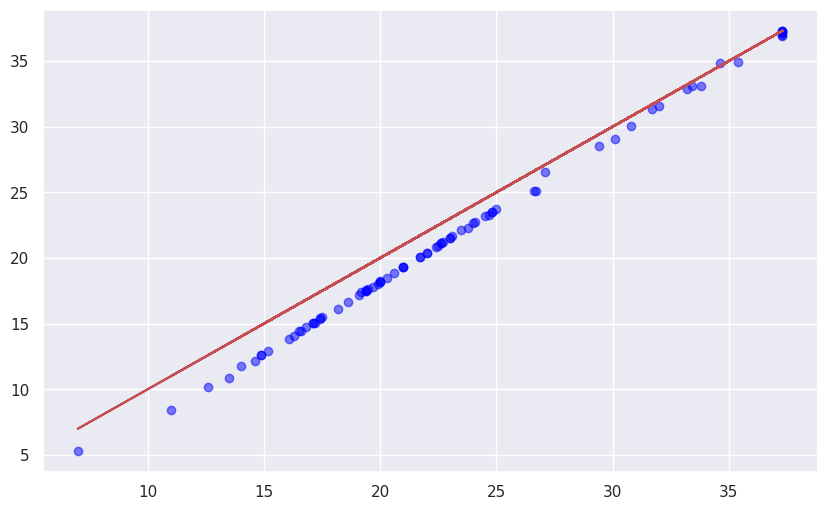

In [61]:
# plotting test and pred values
plt.figure(figsize=(10,6))
plt.scatter(y_test,pred_rf, c="blue", alpha=0.5)
plt.plot(y_test,y_test,'r')